In [ ]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 4.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=418e2f073f3735d9ee08e4811f171d9ee618a272bbf8794ccd65177dfaea43c7
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


# Scikit-fuzzy

Library for fuzzy logic inference, [documentation](https://scikit-fuzzy.github.io/scikit-fuzzy/index.html).

Other alternatives ()

## Antecedent

Antecedent (input/sensor) variable for a fuzzy control system




In [ ]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

demo = ctrl.Antecedent(np.arange(0, 10, 0.25), 'demo')

## Member functions


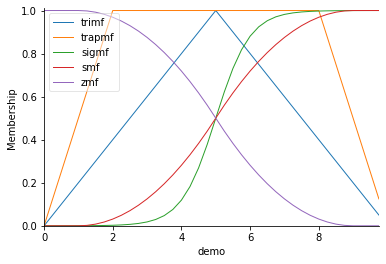

In [ ]:
# Triangular membership function
demo['trimf'] = fuzz.trimf(demo.universe, [0, 5, 10])

# Trapezoidal membership function
demo['trapmf'] = fuzz.trapmf(demo.universe, [0, 2, 8, 10])
# Sigmoid membership function
center = 5.0
width_control = 2.0
demo['sigmf'] = fuzz.sigmf(demo.universe, center, width_control)

# S-function
foot = 1.0
ceiling = 9.0
demo['smf'] = fuzz.smf(demo.universe, foot, ceiling)

# Z-function
demo['zmf'] = fuzz.zmf(demo.universe, foot, ceiling)



demo.view()

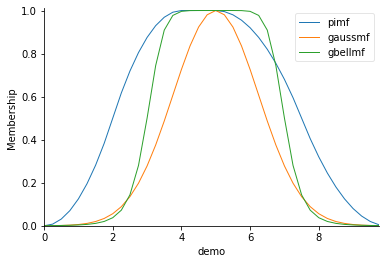

In [ ]:
# just to see clearly init agein the space

demo = ctrl.Antecedent(np.arange(0, 10, 0.25), 'demo')
# Pi-function
demo['pimf'] = fuzz.pimf(demo.universe, 0.0, 4.0, 5.0, 10.0)

# Gaussian function
mean = 5.0
sigma = 1.25
demo['gaussmf'] = fuzz.gaussmf(demo.universe, mean, sigma)

# Generalized Bell-Shaped function
width = 2.0
slope = 4.0
center = 5.0
demo['gbellmf'] = fuzz.gbellmf(demo.universe, width, slope, center)
demo.view()

# Example 1 (buy a house)

Based in [Izquierdo et al,2015](http://luis.izqui.org/papers/Izquierdo_et_al_2015.pdf).

Suppose we want to implement an artificial agent who must select a
suitable house from several options, and his two main concerns are the price of the house and the distance from the house to the agent’s workplace.
A possible approach would be to implement a function f(p, d) that takes numerical inputs p (for price) and d (for distance from work), and produces a numerical score s (for suitability) as the output, i.e. s = f(p, d). 

In [ ]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

price = ctrl.Antecedent(np.arange(0, 200, 1), 'price')
distance = ctrl.Antecedent(np.arange(0, 100, 1), 'distance')
suitability = ctrl.Consequent(np.arange(0, 10,0.1), 'suitability','centroid')



Note that centroid is the method to defuzzy you also can use **bisector**, which make division of the area in two equal parts.

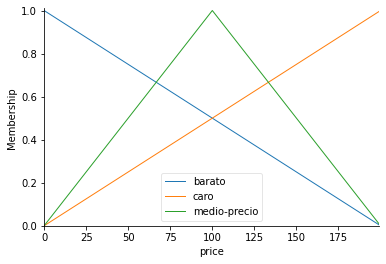

In [ ]:
price['barato']=fuzz.trimf(price.universe, [0.0, 0.0, 200.0])
price['caro']=fuzz.trimf(price.universe, [0.0, 200.0, 200.0])
price['medio-precio']=fuzz.trimf(price.universe, [0.0, 100.0, 200.0])
price.view()

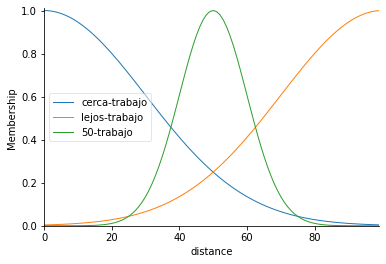

In [ ]:
distance['cerca-trabajo']=fuzz.gaussmf(distance.universe,0.0,30.0)
distance['lejos-trabajo']=fuzz.gaussmf(distance.universe, 100.0,30.0)
distance['50-trabajo']=fuzz.gaussmf(distance.universe, 50.0,10.0)
distance.view()

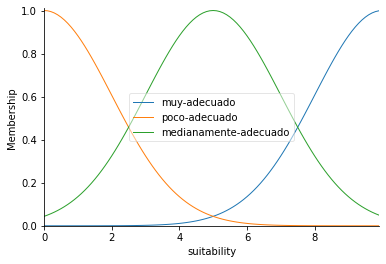

In [ ]:
suitability['muy-adecuado']=fuzz.gaussmf(suitability.universe,10.0,2.0)
suitability['poco-adecuado']=fuzz.gaussmf(suitability.universe, 0.0,2.0)
suitability['medianamente-adecuado']=fuzz.gaussmf(suitability.universe, 5.0,2.0)
suitability.view()

## Rules


- IF (House is *barata* OR *cerca-trabajo*), THEN Suitability is *muy-adecuado*.
- IF (House is *cara* OR *lejos-trabajo*), THEN Suitability is *poco-adecuado*.
- IF (House is *medio-precio* AND *50-trabajo*), THEN
Suitability is *medianamente-adecuado*

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2d0d42c7d0>)

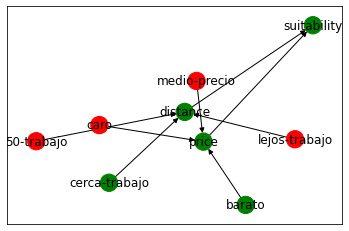

In [ ]:
rule1 = ctrl.Rule(price['barato'] | distance['cerca-trabajo'], suitability['muy-adecuado'])
rule2 = ctrl.Rule(price['caro'] | distance['lejos-trabajo'], suitability['poco-adecuado'])
rule3 = ctrl.Rule(price['medio-precio'] | distance['50-trabajo'], suitability['medianamente-adecuado'])

rule1.view_n()

## Simulating

ControlSystem

        The generator exposes the rules in order from antecedents to
        consequences. Consider for example the following rule dependencies:
            Antecedent -> rule1 -> Intermediary -> rule2 -> Consequence
        If we expose rule2 before rule1, we won't calculate correctly.

In [ ]:
house_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

house = ctrl.ControlSystemSimulation(house_ctrl)


house.input['price'] = 84
house.input['distance'] = 42

# Crunch the numbers
house.compute()
house_ctrl.fuzzy_variables

<generator object ControlSystem.fuzzy_variables at 0x7f2d0d465e50>

5.18586550703911


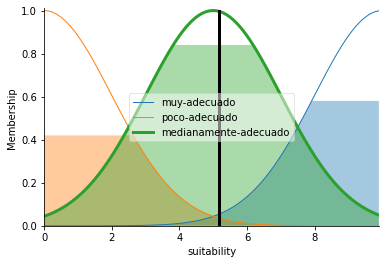

In [ ]:
print(house.output['suitability'])
suitability.view(sim=house)

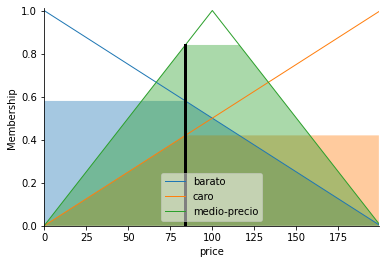

In [ ]:
price.view(sim=house)

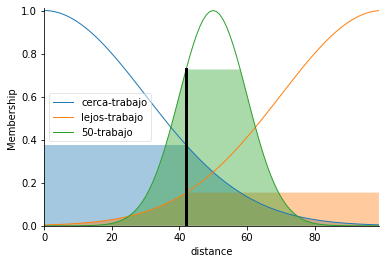

In [ ]:
distance.view(sim=house)

# Exercise

To control the HVAC in a house you are meausuring *temperature* and *humidity*, and you want to control the *fan_speed* using the next rules which has been definied with the owner.

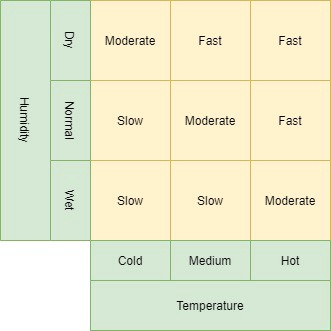 


**Challenge**

Implement in arduino this controlles using [eFLL](https://github.com/alvesoaj/eFLL), a DC motor and a DHT-11 sensor. 